<a href="https://colab.research.google.com/github/Anagha0202/SpaceshipTitanic-HousePrice-Dataset-ColabNotebook/blob/main/Spaceship_Titanic_HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Assignment 0

> 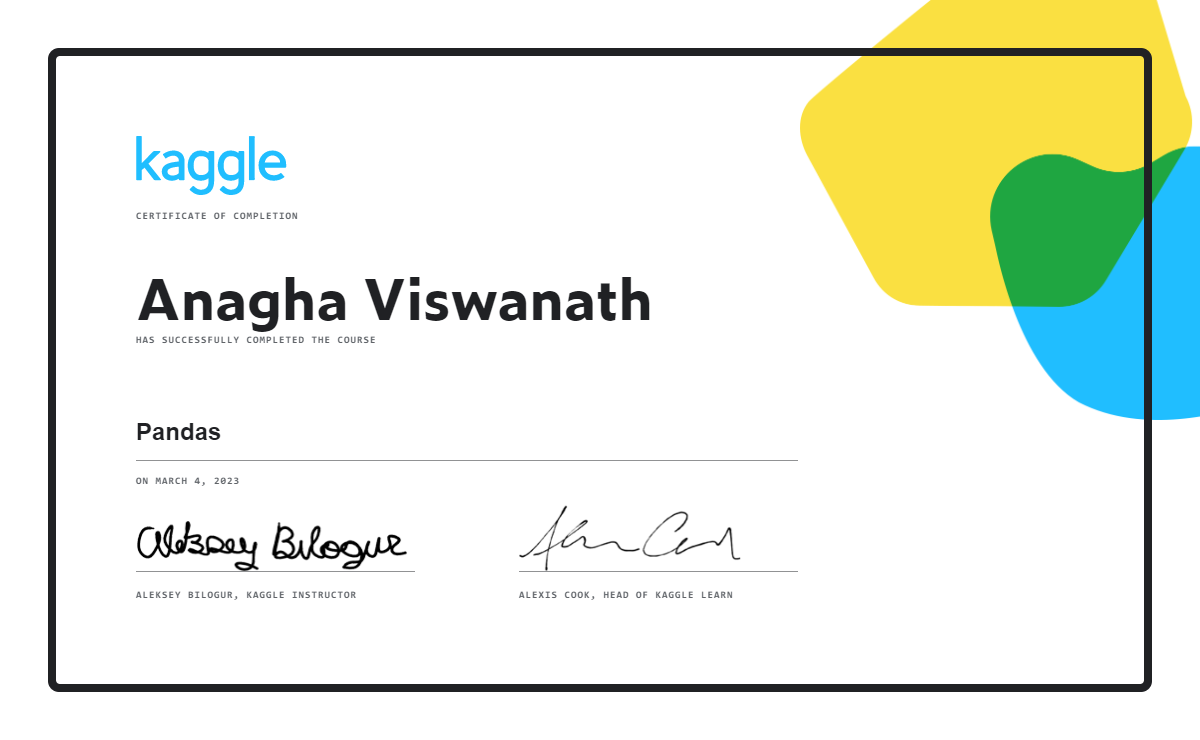

#1. Assigment 1 

> https://www.kaggle.com/competitions/spaceship-titanic

#Loading the Dataset directly from Kaggle


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vanagha","key":"f5b90867b2526e1be2cc03e606538174"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 !kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           9492        310  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7934        196  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2478         78  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 73.6MB/s]


In [ ]:
! mkdir spaceship-titanic

In [ ]:
! unzip spaceship-titanic.zip -d spaceship-titanic

Archive:  spaceship-titanic.zip
  inflating: spaceship-titanic/sample_submission.csv  
  inflating: spaceship-titanic/test.csv  
  inflating: spaceship-titanic/train.csv  


#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

#Reading the Dataset

In [ ]:
#Training Data
df = pd.read_csv("/content/spaceship-titanic/train.csv")

In [ ]:
#Test Data
df_test = pd.read_csv("/content/spaceship-titanic/test.csv")

#Initial Exploration of the Training Dataset

In [ ]:
df.shape

(8693, 14)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


>Dataset consists of 8693 rows and 14 features. 
>
>7 are categorical features
>
>6 are numerical features
>
>Transported is the target column of type boolean. 



>Categorical features have the following values:

In [ ]:
df.columns
categorical_features = ["HomePlanet","CryoSleep", "Destination", "VIP"]
for i in categorical_features:
  print(i, "->", df_test.loc[:, i].unique())

HomePlanet -> ['Earth' 'Europa' 'Mars' nan]
CryoSleep -> [True False nan]
Destination -> ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
VIP -> [False nan True]


>The Dataset has null values for most of the features as shown below

In [ ]:
df.isna().sum().sort_values()

PassengerId       0
Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
Name            200
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

#Initial Exploration of Test data

In [ ]:
df_test.shape

(4277, 13)

In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df_test.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


>Test Dataset consists of 4277 rows and 13 features. 
>
>7 are categorical features
>
>6 are numerical features
>
>Transported is the target column not available in the dataset. 



>The Dataset has null values for most of the features as shown below

In [ ]:
df_test.isna().sum().sort_values()

PassengerId       0
VRDeck           80
RoomService      82
HomePlanet       87
Age              91
Destination      92
CryoSleep        93
VIP              93
Name             94
ShoppingMall     98
Cabin           100
Spa             101
FoodCourt       106
dtype: int64

#Training Dataset Visualisation

>Overview of the Numerical features

In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


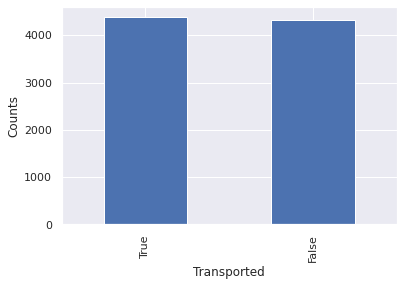

In [ ]:
df.Transported.value_counts().plot(kind="bar")
plt.xlabel("Transported")
plt.ylabel("Counts")
plt.show()

>The target classes are evenly distributed in the training data. Hence there is no dataset imbalance. 

>Distribution of Null values in the training set across the features are as follows:


<AxesSubplot:>

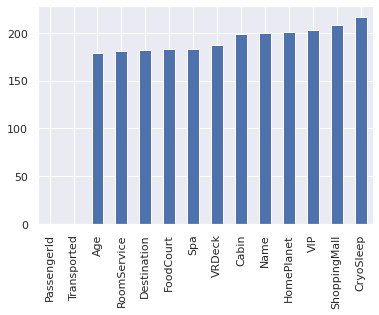

In [ ]:
df.isna().sum().sort_values().plot(kind="bar")

> CryoSleep has the maximum number of Null values. This could be due to the cabins not being assigned to the passengers in order to choose to be put to CryoSleep.


<AxesSubplot:xlabel='HomePlanet', ylabel='Count'>

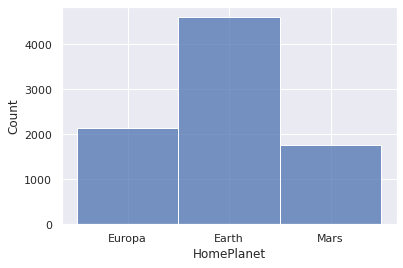

In [ ]:
sns.histplot(df.HomePlanet)

<AxesSubplot:xlabel='HomePlanet'>

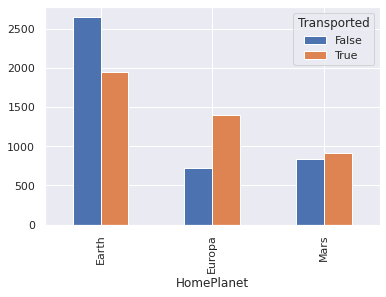

In [ ]:
pd.crosstab(df.HomePlanet, df.Transported).plot(kind="bar")

>Out of all the passengers transported to another dimension during the collision, passengers from Earth have a higher probability of getting transported as the ratio of passenger from Earth is greater compared to passengers from other planets. 

>The passengers from Europa have a higher probability of being transported to another dimension during the collision compared to the passengers from Mars.

<AxesSubplot:xlabel='Destination', ylabel='Count'>

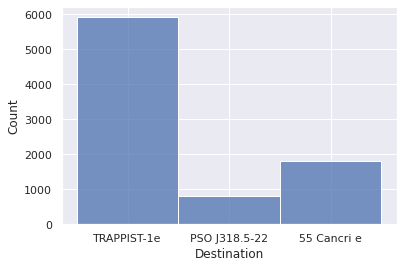

In [ ]:
sns.histplot(df.Destination)

<AxesSubplot:xlabel='Destination'>

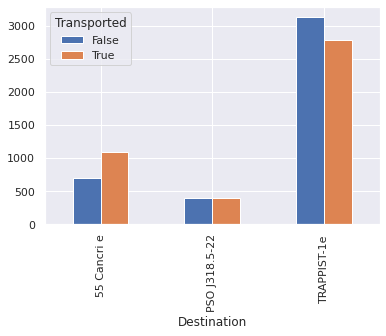

In [ ]:
pd.crosstab(df.Destination, df.Transported).plot(kind="bar")

>We notice that a larger number of passengers with TRAPPIST-1e as destination were not transported to another dimension. 

>Passenger with 55 Cancri e as destination have a better ratio of passengers transported to another dimension.

<AxesSubplot:>

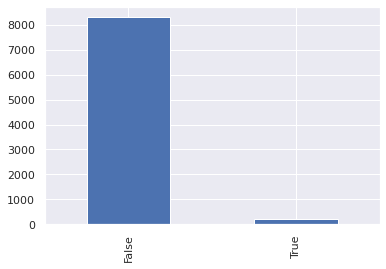

In [ ]:
df.VIP.value_counts().plot(kind="bar")

>The number of passengers who have choosen VIP services is very less. This could be due to the high prices of VIP services or the VIP package does not have attractive features for the traveling groups.

<AxesSubplot:xlabel='Age', ylabel='Count'>

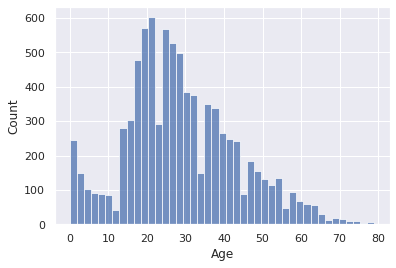

In [ ]:
sns.histplot(df.Age)

<AxesSubplot:xlabel='Age'>

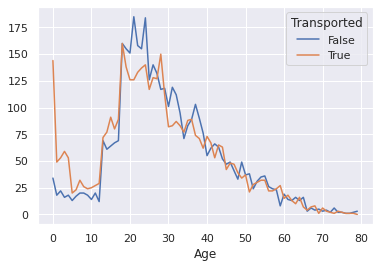

In [ ]:
pd.crosstab(df.Age, df.Transported).plot()

>The spaceship has a lot of passengers between the ages of 20 and 30. 

>The distribution of transported and not transported is also nearly the same for these ages. But between these ages, there is a slight increase in the number of passengers **not** being transported to another dimension. 

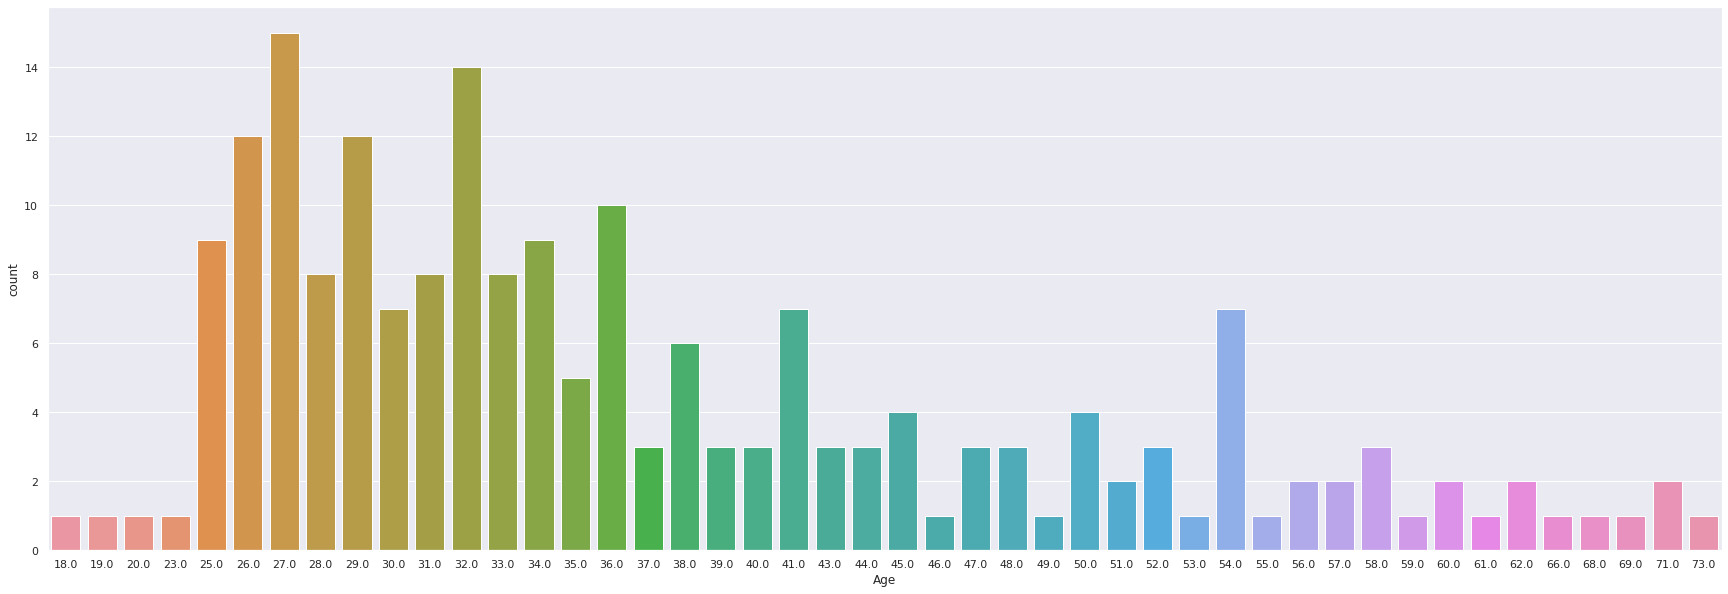

In [ ]:
df_viptrue = df[df["VIP"]==True]
# print(df_viptrue.Age.value_counts())
plt.figure(figsize=(30,10))
sns.countplot(data=df_viptrue, x=df_viptrue.Age)
plt.show()

>Passengers between the age groups of 25-36 have a higher likelihood purchasing the VIP package. Particularly the trend increases between the ages of 25 to 27. 

<AxesSubplot:xlabel='VIP'>

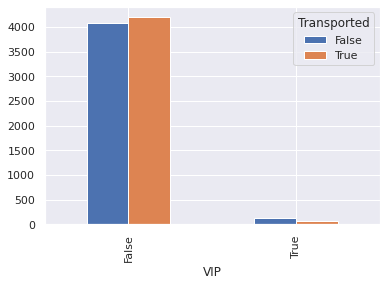

In [ ]:
pd.crosstab(df.VIP, df.Transported).plot(kind="bar")

>The majority of the VIP passengers did not get transported as they might have been in the inner parts of the spaceship enjoying the facilities.


<AxesSubplot:xlabel='VIP'>

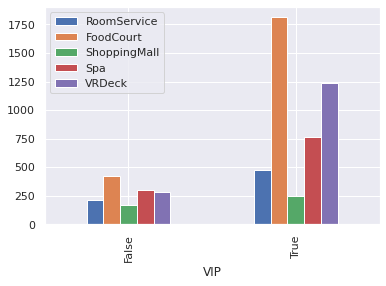

In [ ]:
numerical = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',  'VRDeck']
df[numerical].groupby('VIP').mean().plot(kind="bar")

>The passengers that have choosen VIP package are more likely to spend money at the FoodCourt and the VRDeck. This could be due to the higher cost at the FoodCourt and VRDeck which could be out of budget for Non-VIP.

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

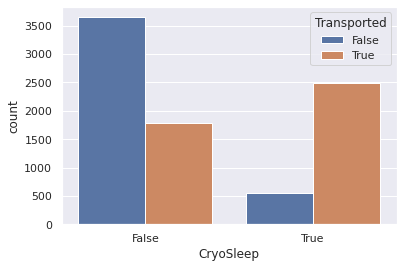

In [ ]:
sns.countplot(data=df, x="CryoSleep", hue="Transported")

>CryoSleep might be an important feature for the Transport prediction as it seems to have a positive correlation with the target.

<AxesSubplot:xlabel='CryoSleep'>

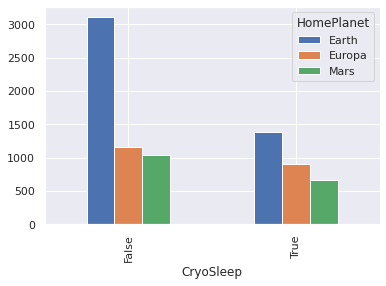

In [ ]:
pd.crosstab(df.CryoSleep, df.HomePlanet).plot(kind="bar")

<AxesSubplot:xlabel='CryoSleep'>

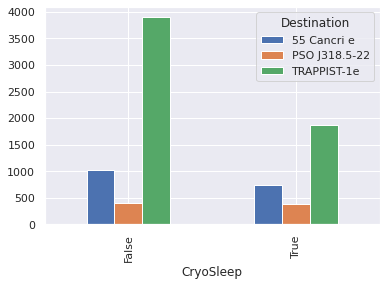

In [ ]:
pd.crosstab(df.CryoSleep, df.Destination).plot(kind="bar")

<AxesSubplot:xlabel='HomePlanet'>

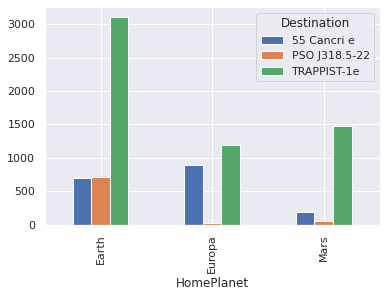

In [ ]:
pd.crosstab(df.HomePlanet, df.Destination).plot(kind="bar")

>Based on the above graphs, we see that a large number of passengers are travelling from Earth to TRAPPIST-1e, and a large number of them have chosen to not be put to CryoSleep. This could mean that the distance between Earth and TRAPPIST-1e might be less. 

In [ ]:
df_noid = df.drop("PassengerId", axis=1)
df_noid.corr()['Transported'].sort_values()

RoomService    -0.244611
Spa            -0.221131
VRDeck         -0.207075
Age            -0.075026
ShoppingMall    0.010141
FoodCourt       0.046566
Transported     1.000000
Name: Transported, dtype: float64

<ipython-input-203-6f936e75b2ce>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

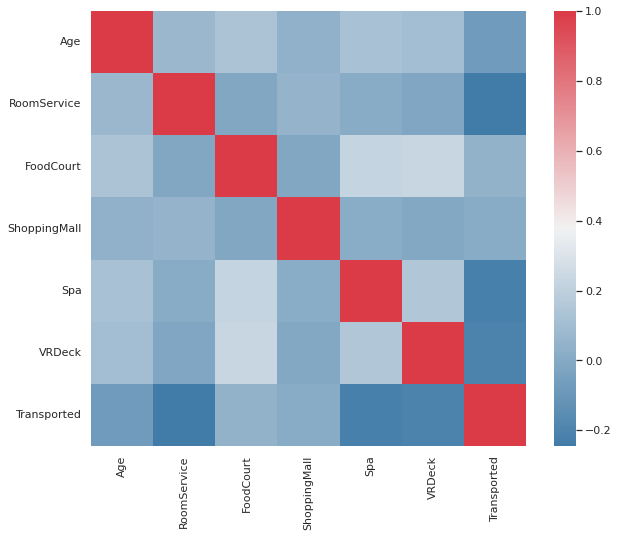

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_noid.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

>VRDeck, Spa and RoomService seems to have negative correlation with the target.

>This could mean that if a passenger was using the spa during the collision, they have a higher probability of not getting transported to the other dimension.

#Training Dataset Preprocessing

Dropping Columns : 


> As the name of the passenger and passengerId does not affect their transportation to another dimension, we have dropped these columns.



In [ ]:
df = df.drop(["PassengerId","Name"], axis=1)
print(df.shape)
print(df.head())

(8693, 12)
  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True  


In [ ]:
cols_to_check = df.columns
df_isnull = df[cols_to_check].isna().apply(lambda x: all(x), axis=1) 
print(df_isnull.value_counts())

False    8693
dtype: int64


>Dataset does not have any rows where all the features values are null.

Filling the Null Values:

> For the Numerical features - using SimpleImputer to fill in the null values with the median of the values.

> For the Categorical features - using SimpleImputer to fill in the null values with the mode of the values.

>For the CryoSleep and VIP features - filling in the null values with Unknown

In [ ]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer = SimpleImputer(strategy='median' )
imputer.fit(df[numerical_cols])
df[numerical_cols] = imputer.transform(df[numerical_cols])


In [ ]:
df["CryoSleep"] = df.CryoSleep.fillna("Unknown")
df = pd.DataFrame(df)

df["VIP"] = df.VIP.fillna("Unknown")
df = pd.DataFrame(df)

categorical_cols = ['HomePlanet', 'Destination']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[categorical_cols])
df[categorical_cols] = imputer.transform(df[categorical_cols])

>The location of the cabin might be an important factor in determing whether a passenger was transported to another dimension. Hence we are converting the Cabin feature to contain only the Cabin alphabet.

In [ ]:
df["Cabin"] = df["Cabin"].str.slice(0,1)

In [ ]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
X = df.iloc[:,0:6] 
y = df.iloc[:, -1]

In [ ]:
X.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,Europa,False,B,TRAPPIST-1e,39.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False
2,Europa,False,A,TRAPPIST-1e,58.0,True
3,Europa,False,A,TRAPPIST-1e,33.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False


In [ ]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

>The dataset contains categorical features, hence we are performing one hot encoding for these features.

In [ ]:
X = pd.get_dummies(X, drop_first=True)
print(X.head())

    Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0  39.0                  1                0               0   
1  24.0                  0                0               0   
2  58.0                  1                0               0   
3  33.0                  1                0               0   
4  16.0                  0                0               0   

   CryoSleep_Unknown  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  \
0                  0        1        0        0        0        0        0   
1                  0        0        0        0        0        1        0   
2                  0        0        0        0        0        0        0   
3                  0        0        0        0        0        0        0   
4                  0        0        0        0        0        1        0   

   Cabin_T  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  \
0        0                          0                        1         0   


#Testing Data Preprocessing

In [ ]:
df_test_new = df_test.drop(["PassengerId","Name"], axis=1)
print(df_test_new.shape)
print(df_test_new.head())

(4277, 11)
  HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0      Earth      True  G/3/S  TRAPPIST-1e  27.0  False          0.0   
1      Earth     False  F/4/S  TRAPPIST-1e  19.0  False          0.0   
2     Europa      True  C/0/S  55 Cancri e  31.0  False          0.0   
3     Europa     False  C/1/S  TRAPPIST-1e  38.0  False          0.0   
4      Earth     False  F/5/S  TRAPPIST-1e  20.0  False         10.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0           0.0  2823.0     0.0  
2        0.0           0.0     0.0     0.0  
3     6652.0           0.0   181.0   585.0  
4        0.0         635.0     0.0     0.0  


>Since the testing data also contains Null Values, we are filling in the Null values.

In [ ]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
imputer = SimpleImputer(strategy='median' )
imputer.fit(df_test_new[numerical_cols])
df_test_new[numerical_cols] = imputer.transform(df_test_new[numerical_cols])

In [ ]:
df_test_new["CryoSleep"] = df_test_new.CryoSleep.fillna("Unknown")
df_test_new = pd.DataFrame(df_test_new)

df_test_new["VIP"] = df_test_new.VIP.fillna("Unknown")
df_test_new = pd.DataFrame(df_test_new)

categorical_cols = ['HomePlanet', 'Destination']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_test_new[categorical_cols])
df_test_new[categorical_cols] = imputer.transform(df_test_new[categorical_cols])

In [ ]:
df_test_new["Cabin"] = df_test_new["Cabin"].str.slice(0,1)
print(df_test_new.head())

  HomePlanet CryoSleep Cabin  Destination   Age    VIP  RoomService  \
0      Earth      True     G  TRAPPIST-1e  27.0  False          0.0   
1      Earth     False     F  TRAPPIST-1e  19.0  False          0.0   
2     Europa      True     C  55 Cancri e  31.0  False          0.0   
3     Europa     False     C  TRAPPIST-1e  38.0  False          0.0   
4      Earth     False     F  TRAPPIST-1e  20.0  False         10.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  
0        0.0           0.0     0.0     0.0  
1        9.0           0.0  2823.0     0.0  
2        0.0           0.0     0.0     0.0  
3     6652.0           0.0   181.0   585.0  
4        0.0         635.0     0.0     0.0  


In [ ]:
df_test_new = df_test_new.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

>One hot encoding for the categorical features

In [ ]:
df_test_new = pd.get_dummies(df_test_new, drop_first=True)
print(df_test_new.head())

    Age  HomePlanet_Europa  HomePlanet_Mars  CryoSleep_True  \
0  27.0                  0                0               1   
1  19.0                  0                0               0   
2  31.0                  1                0               1   
3  38.0                  1                0               0   
4  20.0                  0                0               0   

   CryoSleep_Unknown  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  \
0                  0        0        0        0        0        0        1   
1                  0        0        0        0        0        1        0   
2                  0        0        1        0        0        0        0   
3                  0        0        1        0        0        0        0   
4                  0        0        0        0        0        1        0   

   Cabin_T  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  VIP_True  \
0        0                          0                        1         0   


#Building the Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

>Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_classifier = LogisticRegression(max_iter=7000,random_state = 0)
lg_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=7000, random_state=0)

In [ ]:
y_pred = lg_classifier.predict(X_test)

[[852 225]
 [407 690]]


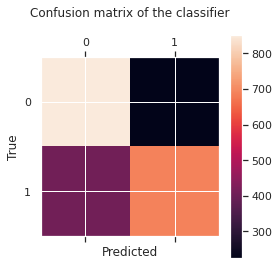

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.68      0.79      0.73      1077
        True       0.75      0.63      0.69      1097

    accuracy                           0.71      2174
   macro avg       0.72      0.71      0.71      2174
weighted avg       0.72      0.71      0.71      2174



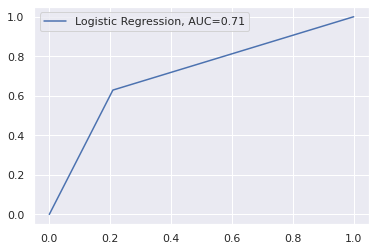

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

plt.legend()

> The Logistic Regression model performs fairly well. Since we have balanced classes, we can use accuracy as a metric to compare models. It has an accuracy of 71%.

>From the ROC plot of the logistic regression model, we can observe that it is better than a random model. It has an AUC of 0.71. 

>Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'gini',max_depth=10, random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = dt_classifier.predict(X_test)

[[897 180]
 [409 688]]


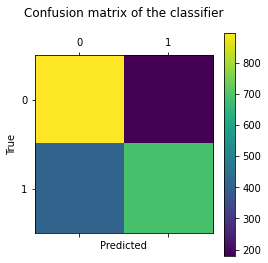

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.69      0.83      0.75      1077
        True       0.79      0.63      0.70      1097

    accuracy                           0.73      2174
   macro avg       0.74      0.73      0.73      2174
weighted avg       0.74      0.73      0.73      2174



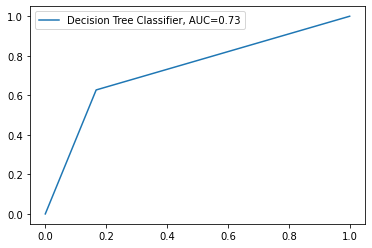

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))
plt.legend()

>The Decision Tree classifier has also performed well. It has an accuracy of 73% and an AUC of 0.73.

> Since the AUC value of Decision Tree is higher than the AUC of Logistic Regression, it is a better model for the prediciton of Transported.

#Running the model on the Test Data

>Logistic Regression

In [ ]:
y_test_pred_lg = lg_classifier.predict(df_test_new)

In [ ]:
print(y_test_pred_lg)

[ True False  True ...  True False  True]


In [ ]:
df_test_lg = df_test
df_test_lg["final_pred"] = y_test_pred_lg
df_final_lg = df_test_lg.loc[:, ["PassengerId", "final_pred"]]
print(df_final_lg.head())

  PassengerId  final_pred
0     0013_01        True
1     0018_01       False
2     0019_01        True
3     0021_01       False
4     0023_01       False


>Decision Tree Classifier

In [ ]:
y_test_pred_dt = dt_classifier.predict(df_test_new)

In [ ]:
print(y_test_pred_dt)

[ True False  True ...  True False False]


In [ ]:
df_test_dt = df_test
df_test_dt["final_pred"] = y_test_pred_dt
df_final_dt = df_test_dt.loc[:, ["PassengerId", "final_pred"]]
print(df_final_dt.head())

  PassengerId  final_pred
0     0013_01        True
1     0018_01       False
2     0019_01        True
3     0021_01       False
4     0023_01       False


#Reflection
>The Logistic Regression model performed well with an accuracy of 71% and precision of 74%. It gave an AUC of 0.71 which is better than a random model.

>The Decision Tree Classifier performed better than the Logistic Regression model with an accuracy of 73% and an AUC of 0.73. Therefore, the Decision Tree might be a better model for this dataset compared to the Logistic regression model based on the AUC values.

>However, there might still be improvements that could be done to this model.

>We might improve the accuracy and other metrics of the Decision Tree Model by increasing the depth of the tree. 

>We could also split the Cabin feature and utilise the exact room number to provide more informtion to the model which might help in increasing its accuracy and hence provide better predictions. 

#2. Assignment 2

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

#Loading the Dataset from Kaggle 

In [ ]:
#Run if needed

# ! pip install -q kaggle

# from google.colab import files
# files.upload()

# ! mkdir ~/.kaggle

# ! cp kaggle.json ~/.kaggle/

# ! chmod 600 ~/.kaggle/kaggle.json

#  !kaggle datasets list

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 87.9MB/s]


In [ ]:
! mkdir house-prices-advanced-regression-techniques

In [ ]:
! unzip house-prices-advanced-regression-techniques.zip -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: house-prices-advanced-regression-techniques/train.csv  


#Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Reading the Dataset

In [ ]:
#Training Data
df = pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")

In [ ]:
#Testing Data
df_test = pd.read_csv("/content/house-prices-advanced-regression-techniques/test.csv")

#Initial Exploration of the Training Data 

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


>The dataset has 1460 rows and 81 features

>It has 38 numerical features and 43 categorical values.

>The dataset also has null data as below:

In [ ]:
df.columns[df.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
df_na = df.isna().sum()
df_na[df_na>0] 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#Training Data Visualisation

In [ ]:
df["SalePrice"].mean()

180921.19589041095

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


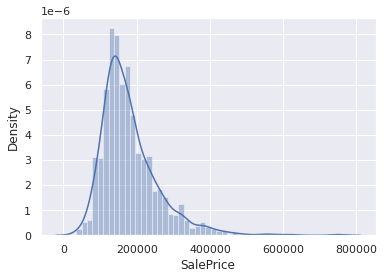

In [ ]:
sns.distplot(df['SalePrice']);

In [ ]:
print("Skewness: ", df['SalePrice'].skew())
print("Kurtosis: ", df['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


>The target SalesPrice column has Positive Skewnewss. 

>Most of the Sold houses are priced around 200,000 which is the average price of houses. 

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

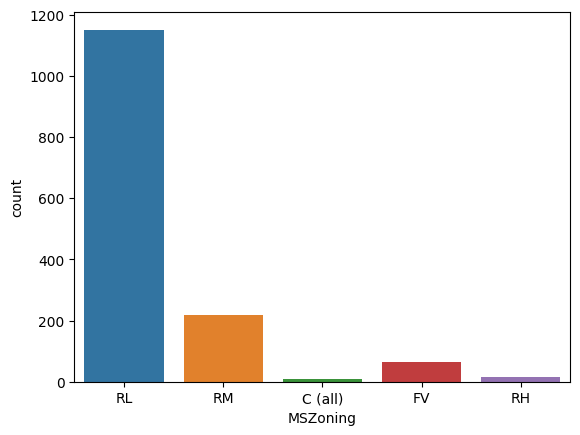

In [ ]:
sns.countplot(data=df, x=df.MSZoning)

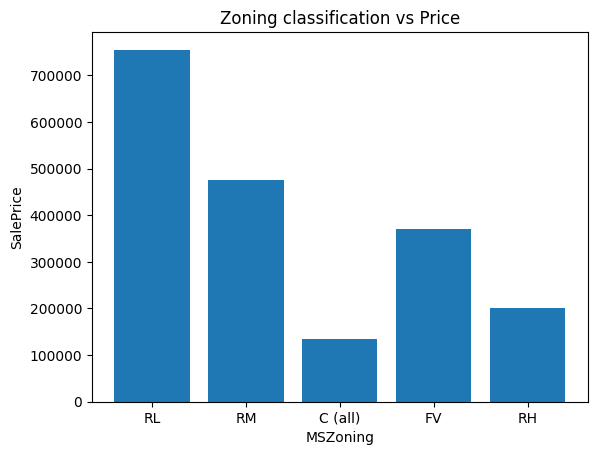

In [ ]:
# plt.style.use('default')
plt.bar(df.MSZoning, df.SalePrice)
plt.title('Zoning classification vs Price')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

>The most popular Zoning classification is Resedential Low density. 

>One reason for the high counts could be due to people frequently purchasing and selling houses in this zone. Due to this the zone could be marked as low density. 

>The high prices of RL can be due to the higher frequency of selling houses in this zone. 

>RM zone on the other hand is more stable. People might live here for longer periods of time. This could be the reason for less frequent sales but still higher prices.

>FV zone houses are sold less frequently but have higher prices. This could be due to the location of the houses and less availability of houses. 

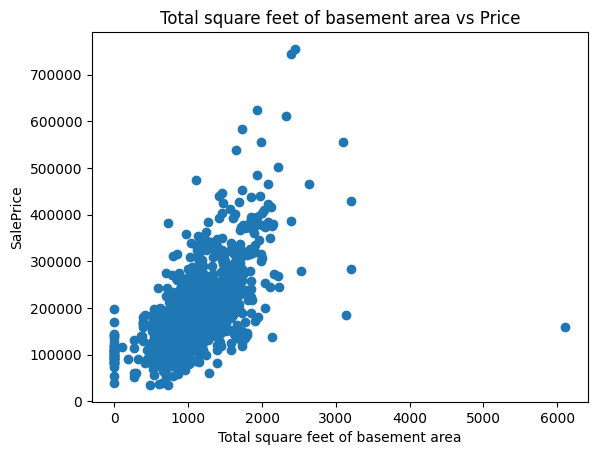

In [ ]:
plt.scatter(df.TotalBsmtSF, df.SalePrice)
plt.title('Total square feet of basement area vs Price')
plt.xlabel('Total square feet of basement area')
plt.ylabel('SalePrice')
plt.show()

>The SalePrice increases exponetially with the size of the basement

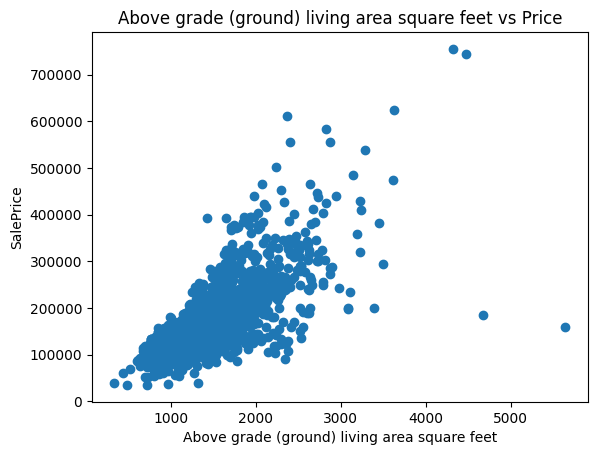

In [ ]:
plt.scatter(df.GrLivArea, df.SalePrice)
plt.title('Above grade (ground) living area square feet vs Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('SalePrice')
plt.show()

>The SalePrice is increasing linearly with the size of ground floor living area.

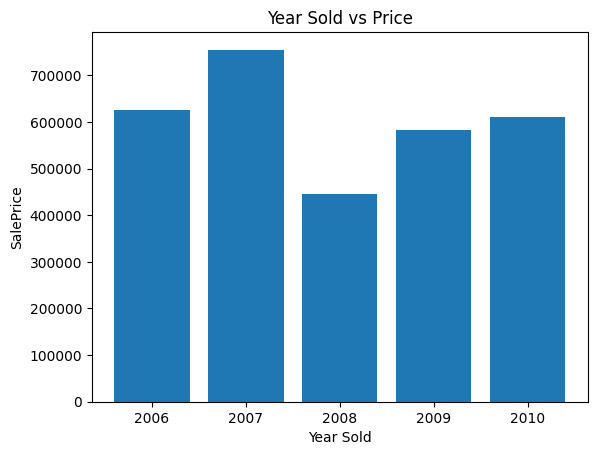

In [ ]:
plt.bar(df.YrSold, df.SalePrice)
plt.title('Year Sold vs Price')
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()

>The prices were increasing until 2007. It might have decreased due to the economical conditions during 2008. But an upward trend can be observed since 2008 due to the improving economical conditions. 

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

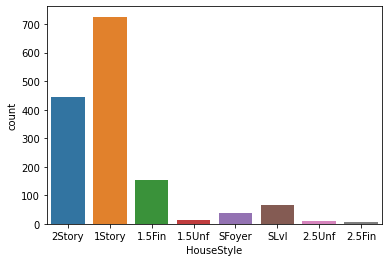

In [ ]:
sns.countplot(data=df, x=df.HouseStyle)

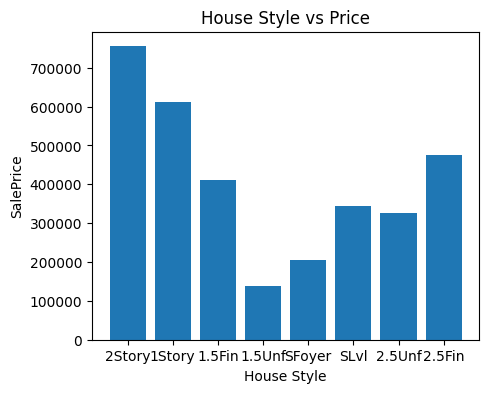

In [ ]:
plt.figure(figsize=[5,4])
plt.bar(df.HouseStyle, df.SalePrice)
plt.title('House Style vs Price')
plt.xlabel('House Style')
plt.ylabel('SalePrice')
plt.show()

>The most popular house styles are 1 and 2 story houses. 

>The price of 2story houses could be more due to more availability of amenities compared to 1story houses.

<AxesSubplot:xlabel='HouseStyle'>

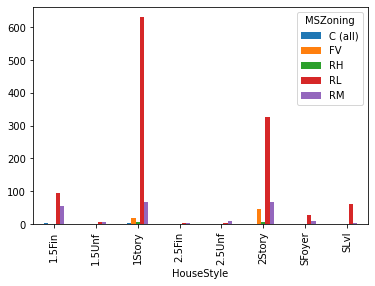

In [ ]:
pd.crosstab(df.HouseStyle, df.MSZoning).plot(kind="bar")

> 1story houses are the most frequently sold in the RL Zone. 
>This could be due to the lesser construction time for building 1story houses. 

>2story houses are also frequently sold in the RL Zone.
>This can be due to additions or remodeling of the house and reselling it.

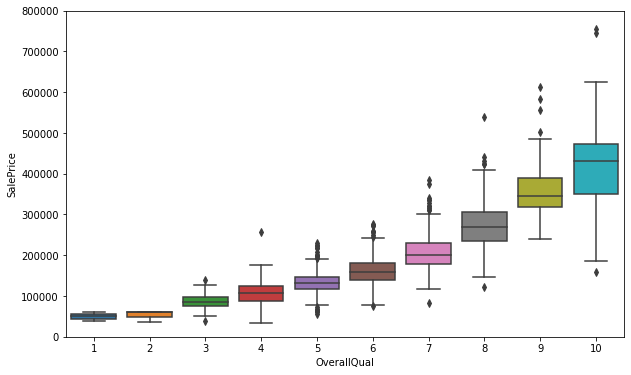

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(data=df, x="OverallQual", y="SalePrice",)
fig.axis(ymin=0, ymax=800000);

>There is a linear relationship between the Overall quality of materials used and the sale price of the house.

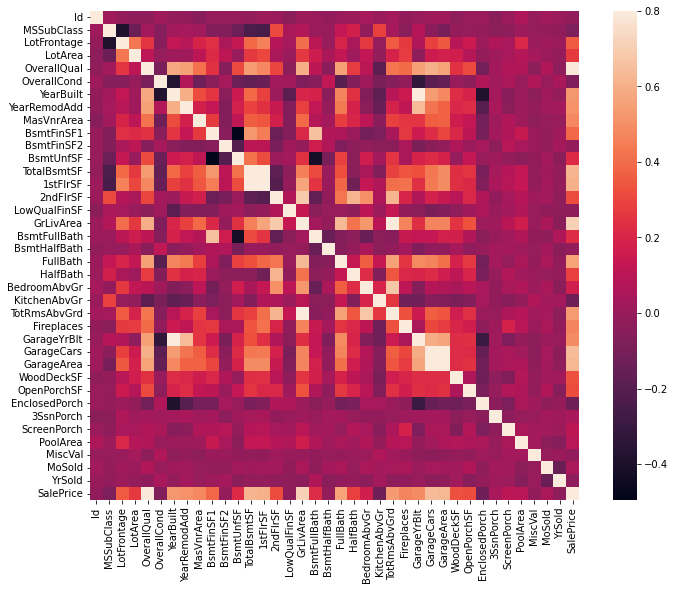

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
df_noid=df.drop("Id", axis=1)
df_noid.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

>Since there are too many features, we are checking the correlation between the top 10 features and the target SalePrice.

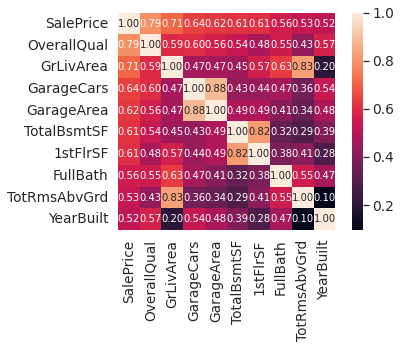

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

>The GarageCars and GarageArea gives the same information (multicollinearity), we will only take one of them.

> Similarly, we will take one out of 
>
>TotalBsmtSF and 1stFlrSF , and 
>
>TotRmsAbvGrd and GrLivArea


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


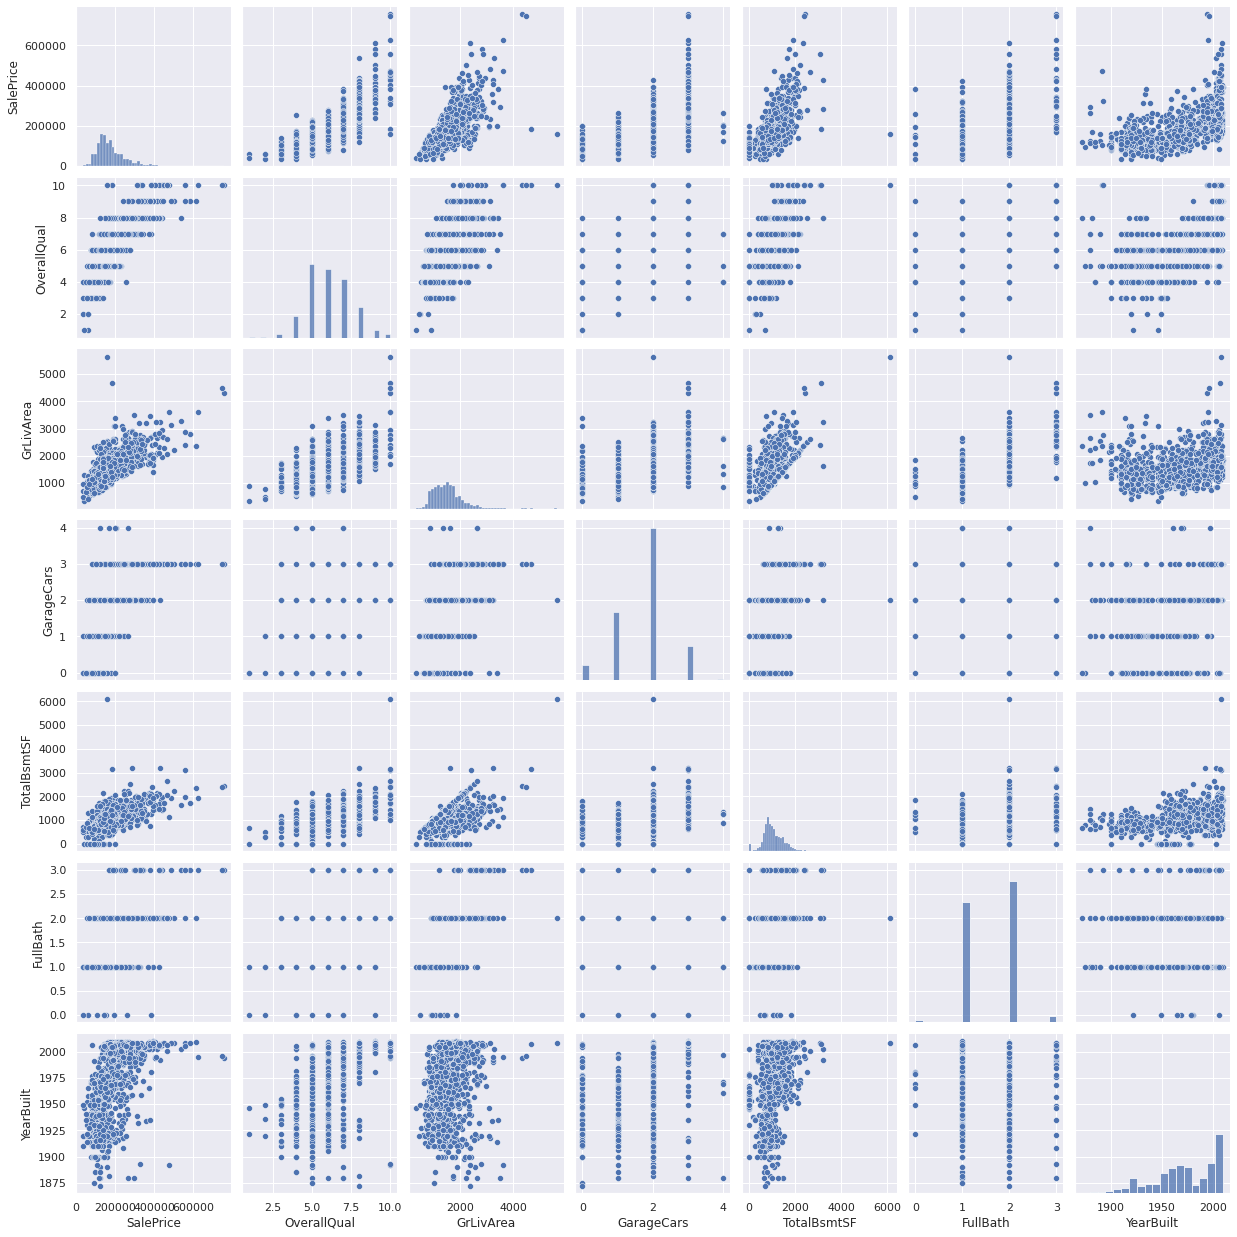

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

#Training Data Preprocessing

In [ ]:
all_cols = ["MSZoning", "GrLivArea", "GarageArea", "TotalBsmtSF", "OverallQual","SalePrice"]

>We are considering only the above columns from the model because they have the highest correlation with the SalePrice

>Filling in the Missing Values:
  
>Numercial Features - using SimpleImputer to fill in the null values with the median of the values

>Categorical Features - using the SimpleImputer to fill in the null values with the mode of the features

In [ ]:
numerical_cols = ["GrLivArea", "GarageArea", "TotalBsmtSF"]
imputer = SimpleImputer(strategy='median' )
imputer.fit(df[numerical_cols])
df[numerical_cols] = imputer.transform(df[numerical_cols])

In [ ]:
categorical_cols = ["MSZoning", "OverallQual"]
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[categorical_cols])
df[categorical_cols] = imputer.transform(df[categorical_cols])

In [ ]:
df[all_cols].isna().sum()

MSZoning       0
GrLivArea      0
GarageArea     0
TotalBsmtSF    0
OverallQual    0
SalePrice      0
dtype: int64

>Standardisation of features:

>Applying log to the numerical features to standardise the values

In [ ]:
df["SalePrice"] = np.log1p(df["SalePrice"])
df["GrLivArea"] = np.log1p(df["GrLivArea"])
df["GarageArea"] = np.log1p(df["GarageArea"])
df["TotalBsmtSF"] = np.log1p(df["TotalBsmtSF"])

>Converting categorical features using one hot encoding:

In [ ]:
df_new = pd.DataFrame(df[all_cols])
df_new = pd.get_dummies(df_new, drop_first=True)
print(df_new.head())

   GrLivArea  GarageArea  TotalBsmtSF  SalePrice  MSZoning_FV  MSZoning_RH  \
0   7.444833    6.308098     6.753438  12.247699            0            0   
1   7.141245    6.133398     7.141245  12.109016            0            0   
2   7.488294    6.411818     6.825460  12.317171            0            0   
3   7.448916    6.466145     6.629363  11.849405            0            0   
4   7.695758    6.729824     7.044033  12.429220            0            0   

   MSZoning_RL  MSZoning_RM  OverallQual_2  OverallQual_3  OverallQual_4  \
0            1            0              0              0              0   
1            1            0              0              0              0   
2            1            0              0              0              0   
3            1            0              0              0              0   
4            1            0              0              0              0   

   OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  OverallQual

In [ ]:
X = df_new.drop("SalePrice", axis=1)
y = df_new.loc[:, "SalePrice"]

print(X.head())
print(y.head())

   GrLivArea  GarageArea  TotalBsmtSF  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0   7.444833    6.308098     6.753438            0            0            1   
1   7.141245    6.133398     7.141245            0            0            1   
2   7.488294    6.411818     6.825460            0            0            1   
3   7.448916    6.466145     6.629363            0            0            1   
4   7.695758    6.729824     7.044033            0            0            1   

   MSZoning_RM  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0            0              0              0              0              0   
1            0              0              0              0              0   
2            0              0              0              0              0   
3            0              0              0              0              0   
4            0              0              0              0              0   

   OverallQual_6  OverallQual_7  OverallQual_8  Ov

#Test Data Preprocessing

In [ ]:
df_na = df_test.isna().sum()
df_na[df_na>0] 

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

>Dataset contains null values for our chosen features.

>Selecting our chosen columns from the dataset

In [ ]:
all_cols_test = all_cols
all_cols_test.remove("SalePrice")
print(all_cols_test)
df_test_new = df_test[all_cols_test]
print(df_test_new)

['MSZoning', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'OverallQual']
     MSZoning  GrLivArea  GarageArea  TotalBsmtSF  OverallQual
0          RH        896       730.0        882.0            5
1          RL       1329       312.0       1329.0            6
2          RL       1629       482.0        928.0            5
3          RL       1604       470.0        926.0            6
4          RL       1280       506.0       1280.0            8
...       ...        ...         ...          ...          ...
1454       RM       1092         0.0        546.0            4
1455       RM       1092       286.0        546.0            4
1456       RL       1224       576.0       1224.0            5
1457       RL        970         0.0        912.0            5
1458       RL       2000       650.0        996.0            7

[1459 rows x 5 columns]


>Null Values: 

>>Filling in the null values based on the median for the numerical values and mode for the categorical values

In [ ]:
numerical_cols = ["GrLivArea", "GarageArea", "TotalBsmtSF"]
imputer = SimpleImputer(strategy='median' )
imputer.fit(df_test_new[numerical_cols])
df_test_new[numerical_cols] = imputer.transform(df_test_new[numerical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
categorical_cols = ["MSZoning", "OverallQual"]
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_test_new[categorical_cols])
df_test_new[categorical_cols] = imputer.transform(df_test_new[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_test_new.head()

,MSZoning,GrLivArea,GarageArea,TotalBsmtSF,OverallQual
0,RH,896.0,730.0,882.0,5
1,RL,1329.0,312.0,1329.0,6
2,RL,1629.0,482.0,928.0,5
3,RL,1604.0,470.0,926.0,6
4,RL,1280.0,506.0,1280.0,8


>Standardisation:

>>Applying log for numerical values

>>Applying one hot encoding for categorical values

In [ ]:
df_test_new["GrLivArea"] = np.log1p(df_test_new["GrLivArea"])
df_test_new["GarageArea"] = np.log1p(df_test_new["GarageArea"])
df_test_new["TotalBsmtSF"] = np.log1p(df_test_new["TotalBsmtSF"])

<ipython-input-128-8b78579fbb8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_new["GrLivArea"] = np.log1p(df_test_new["GrLivArea"])
<ipython-input-128-8b78579fbb8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_new["GarageArea"] = np.log1p(df_test_new["GarageArea"])
<ipython-input-128-8b78579fbb8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_test_new = pd.get_dummies(df_test_new, drop_first=True)
print(df_test_new.head())

   GrLivArea  GarageArea  TotalBsmtSF  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0   6.799056    6.594413     6.783325            0            1            0   
1   7.192934    5.746203     7.192934            0            0            1   
2   7.396335    6.180017     6.834109            0            0            1   
3   7.380879    6.154858     6.831954            0            0            1   
4   7.155396    6.228511     7.155396            0            0            1   

   MSZoning_RM  OverallQual_2  OverallQual_3  OverallQual_4  OverallQual_5  \
0            0              0              0              0              1   
1            0              0              0              0              0   
2            0              0              0              0              1   
3            0              0              0              0              0   
4            0              0              0              0              0   

   OverallQual_6  OverallQual_7  OverallQual_8  Ov

#Building the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

Multiple_Linear_regression = LinearRegression()
Multiple_Linear_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn import metrics

y_pred1 = Multiple_Linear_regression.predict(X_test)
MSE1 = metrics.mean_squared_error(y_test, y_pred1)
print("Mean Squared Error: ", MSE1)

print("Intercept : ", Multiple_Linear_regression.intercept_)

print("Co-efficient: ", Multiple_Linear_regression.coef_)
list(zip(X.columns,Multiple_Linear_regression.coef_))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred1)
print("R^2 score: ", score)

Mean Squared Error:  0.031314525392942806
Intercept :  7.328475038514571
Co-efficient:  [0.43588303 0.04032949 0.04097454 0.57960021 0.44476737 0.58573821
 0.38268138 0.03215724 0.14119579 0.25257655 0.31677862 0.41474758
 0.56068145 0.75064612 1.01002786 1.01271641]
Root Mean Squared Error: 0.17695910655556216
R^2 score:  0.7894368147604285


> The model has an r^2 value of 0.78 which is closer to 1. This means that the information provided by the chosen features were good enough for the model to perform the prediction. 



#Running the model on the Test Data

In [ ]:
y_test_pred = Multiple_Linear_regression.predict(df_test_new)

In [ ]:
print(y_test_pred)

[11.59750708 11.99070742 11.98419031 ... 11.8781897  11.50845031
 12.33241098]


In [ ]:
final_pred = np.exp(y_test_pred)
print(final_pred)

[108826.16579823 161249.38523616 160201.92246084 ... 144089.46951499
  99553.4839169  226933.20014974]


In [ ]:
df_test["final_pred"] = final_pred
df_final = df_test.loc[:, ["Id", "final_pred"]]
print(df_final.head())

     Id     final_pred
0  1461  108826.165798
1  1462  161249.385236
2  1463  160201.922461
3  1464  175311.418385
4  1465  225969.870613


#Reflection
>The simple Linear Regression model is performing well for the given dataset and features that we have chosen. It gave an r^2 score of 0.78 and RMSE of 0.17.

>However, this model can still be improved to give better prediction values.

>There are a few more features with good enough correlation values with the target. We could also include these features and check to see if the model performs better.

>As the number of features available are large, we can also apply Dimensionality Reduction techniques such as the PCA, choose the top features and build the model on these features. This might improve the model's predictions and r^2 scores. 

>We can also build a more complex Decision Tree Regressor model which might perform better than the Linear regression model. 